# Assignment 1: Machine Learning Basics (Solution)
---

## Exercise 1. Dataset Inspection

For this assignment, you will need the packages `sklearn` ([link](https://scikit-learn.org/stable/index.html)) and `matplotlib` ([link](https://matplotlib.org/)). 

Please complete the following steps.


- Load the “diabetdiaes dataset”: set `return_X_y` to `True` and store the features in `diabetes_X` and labels in `diabetes_y`.


- Check the dimensions of `diabetes_X` and `diabetes_y`.


- Visual inspection of a dataset is usually the first step after loading the dataset and also a crucial step prior to the actual learning process. However, here the feature space is high-dimensional, thus difficult to visualize. Let’s reduce it to 2-D using the following code.
<br><br>

                    from sklearn import decomposition
                    pca = decomposition.PCA(n_components=2)
                    pca.fit(diabetes_X)
                    X_2d = pca.transform(diabetes_X)

Tip: the first principal component can be accessed as `X_2d[:,0]`; the second principal component can be accessed as `X_2d[:,1]`.

In [ ]:
# import matplotlib and sklearn
import sklearn
import matplotlib.pyplot as plt

In [ ]:
# load diabetes dataset and print dimensions
from sklearn import datasets

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
print(diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [ ]:
from sklearn import decomposition

# Decompose high dimensional data to 2 dimensions
pca = decomposition.PCA(n_components=2)
pca.fit(diabetes_X)
X_2d = pca.transform(diabetes_X)

print(X_2d.shape)

(442, 2)


Now, let's use `matplotlib` to plot `X_2d` and produce Figure 1. Remember to provide the axis labels as appeared in the figure.

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151662229-62615e47-38f6-4024-9396-47e97b11211d.png"/>

</p>

<p align="center">
  <em>Figure 1: Visual inspection of the dataset.</em>
</p>




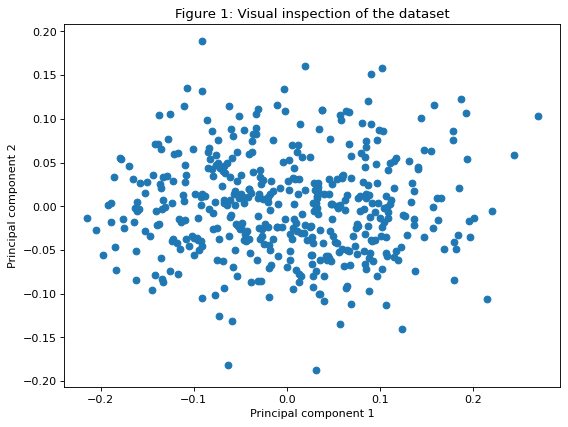

In [ ]:
# Use matplotlib to plot
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80)
ax.scatter(X_2d[:,0], X_2d[:,1]) # The type of plot we do is known as a scatterplot
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title("Figure 1: Visual inspection of the dataset");


The default labels of this dataset (i.e., `diabetes_y`) are numerical and not categorical. This means if we want to perform classification instead of regression, we need to convert the labels from numerical to categorical. This kind of conversion is commonly used in various machine learning projects. 

Here is a conversion method: take the average value of `diabetes_y` and create another variable `y_binary` for storing the binary labels `1` and `−1`; for elements in `diabetes_y` that are greater than the average, assign them `1` otherwise `−1`.

Let's visualize the dataset again but this time with the positive examples marked as `+` and negative examples marked as `x`. If successful, you should see Figure 2. Remember to provide the axis labels and legends as appeared in the figure. 

Tip: use `train_test_split` by importing it from `sklearn.model_selection`.

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151720700-525f60a5-a9f4-4496-9c00-a96152d023c2.png" />
</p>

<p align="center">
  <em>Figure 2: Visual inspection of the dataset with binary labels.</em>
</p>

In [ ]:
import numpy as np 

print(type(diabetes_y))

# Calculate the mean and separate into classes
diabetes_y_mean = np.mean(diabetes_y)
y_binary = np.array([1 if i> diabetes_y_mean else -1 for i in diabetes_y])

print(y_binary)

<class 'numpy.ndarray'>
[-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1
  1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1
  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1  1 -1

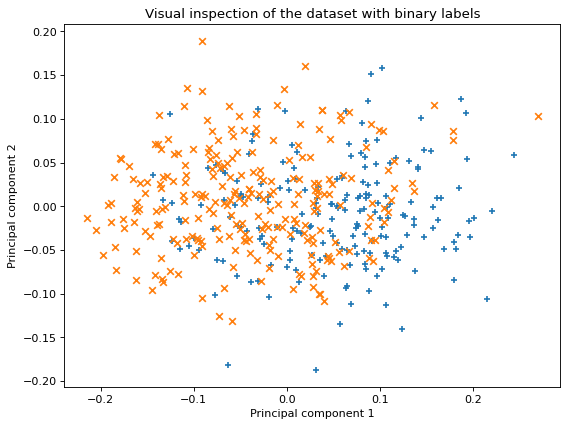

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80)

# Now we want two scatterplots (one for each class) in one place 
ax.scatter(X_2d[:,0][y_binary==1], X_2d[:,1][y_binary==1], marker='+')
ax.scatter(X_2d[:,0][y_binary==-1], X_2d[:,1][y_binary==-1], marker ="x")
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title("Visual inspection of the dataset with binary labels");

## Exercise 2. Bias-variance Tradeoff


First, let's generate 1-D dataset using the following code.


                    data_X = np.array([i*np.pi/180 for i in range(1,150,2)])
                    data_y = np.sin(X) + np.random.normal(0,0.15,len(X))


Split `data_X` and `data_y` into training set that contains 50 samples and test set that contains 25 samples. 

PS. if you want repeatable experiments, you need to fix the random seed.

Use the following code to train a (ordinal) linear regression model.

                    from sklearn.linear_model import LinearRegression
                    lr = LinearRegression()
                    lr.fit(X_train, y_train)

The coefficients and intercept can be accessed as `lr.coef_` and `lr.intercept_`. Use them to compute the training error and test error. Plot the fitted line along with the training set and test set as shown in Figure 3 (you may not have the same plot because the dataset is generated randomly).

In [ ]:
# write a function described above
def generate_data():
  X = np.array([i*np.pi/180 for i in range(1,150,2)])
  y = np.sin(X) + np.random.normal(0,0.15,len(X))
  Data = (X, y)
  return Data

In [ ]:
# Generate data and print dimensions
data_X, data_y = generate_data()
print(data_X.shape, data_y.shape)

(75,) (75,)


In [ ]:
import random 
from sklearn.model_selection import train_test_split

# set seed
# Although you could have just set the random_state, its always a good idea to set seeds this way
SEED = 42 # You know why its 42
random.seed(SEED)
np.random.seed(SEED)

# split data into train and test, having a seed makes sure mine and your split match
X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.33, random_state = SEED)

# check dims
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Reshape them to make compatible with sklearn
X_train = X_train.reshape(-1,1 ) # -1 means ignore this dimension  (just make the other dimension 1)
X_test = X_test.reshape(-1,1 )
y_train = y_train.reshape(-1,1 )
y_test = y_test.reshape(-1,1 )

# check dims again (you'll be doing this kind of stuff a lot)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50,) (50,)
(25,) (25,)
(50, 1) (50, 1)
(25, 1) (25, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a linear model
lr = LinearRegression()

# Train a linear model (That's it, just one line)
lr.fit(X_train, y_train)

# Access the trained coefficients
print(f"Coeff = {lr.coef_}, intercept={lr.intercept_}")

Coeff = [[0.16972627]], intercept=[0.46437375]


In [ ]:
# Make predictions with the trained linear regression model

# Predictions on training set (Uncomment if you just want to look at predictions)
# train_preds = lr.predict(X_train)

# Error on predictions on training set (Make predictions and compare with ground truths to calculate error: function given below)
train_error = lr.score(X_train, y_train)

# Predictions on test set (Uncomment if you just want to look at predictions)
# test_preds = lr.predict(X_test)

# Error on predictions on test set(Compare with ground truths)
test_error = lr.score(X_test, y_test)

print(f"Training error = {train_error}\nTest error={test_error}")

Training error = 0.20418054782609318
Test error=0.3417166114277239


<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151720757-4ea26cc2-17c0-45fb-8273-5024a242ebea.png" />
</p>

<p align="center">
  <em>Figure 3: Ordinal linear regression with the training set and test set. </em>
</p>

<br>

The objective function of ordinal linear regression is the squared errors between predicted labels and true labels:

<br>
$$J(\theta,\theta_0) = \sum_{i=1}^{n}\left(\left(\theta \cdot X^{(i)}+\theta_0\right) - y^{(i)}\right)^2.$$
<br>


Another type of linear regression, called "ridge regression," has a regularization term added to the objective function:


<br>
$$J(\theta,\theta_0) = \frac{1}{n}\sum_{i=1}^{n}\left(\left(\theta \cdot X^{(i)}+\theta_0\right) - y^{(i)}\right)^2 + \alpha\left(\theta^2 + \theta_0^2\right).$$
<br>



Let's create ridge regression using the following code.
<br>

                    from sklearn.linear_model import Ridge
                    rr = Ridge(alpha=10)
                    rr.fit(X_train, y_train)

<br>

Lastly, use the coefficients `rr.coef_` and intercept `rr.intercept_` to compute the training error and test error. Plot the fitted line along with the training set and test set as in Figure 3. Do this for `alpha` under 1, 100, and 1000, respectively. What are the differences? What causes the differences? And when we will have the same line as the ordinal linear regression shown in Figure 3? 



Text(0, 0.5, 'y')

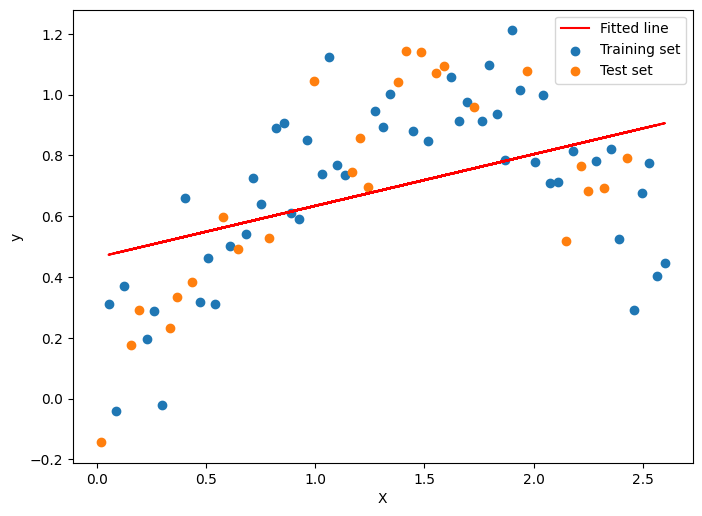

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)

# PLot training data
ax.scatter(X_train,y_train, label = "Training set")

# Use the fitted line to generate 50 data points
# Notice the shaped of coefficients and intercepts above, hence they require [0] to access value
fitted_line = np.array([lr.intercept_[0] + lr.coef_[0]*i for i in X_train.reshape(50,)]).reshape(-1,1)
 
# The line is fitted on training data
ax.plot(X_train, fitted_line, 'r-', label = "Fitted line")

ax.scatter(X_test,y_test, label = "Test set")

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("y")

# Since the data generated here and in the Task figure are at different randomizations, they look different



For alpha =1:

	Trained values: intercept =0.47201535048585486, coefficient =[0.16407245]

	Training error = 0.20395397942635352
	Test error=0.33481335230250886


For alpha =100:

	Trained values: intercept =0.6421752740038738, coefficient =[0.03817569]

	Training error = 0.08152088495321275
	Test error=0.10097592831687341


For alpha =1000:

	Trained values: intercept =0.6873035130394056, coefficient =[0.00478652]

	Training error = 0.011353959057904484
	Test error=0.013231564593386591


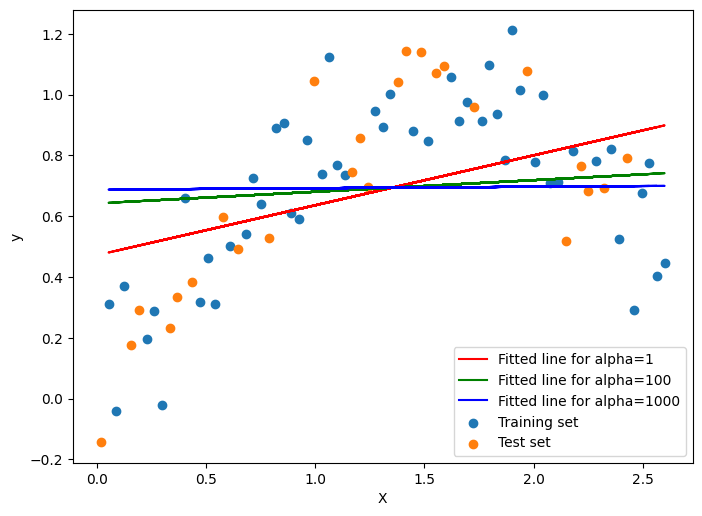

In [ ]:
from sklearn.linear_model import Ridge

alphas = [1, 100, 1000]

fig, ax = plt.subplots(figsize=(8,6), dpi = 100)

ax.scatter(X_train,y_train, label = "Training set")
ax.scatter(X_test,y_test, label = "Test set")

colors = ['r-', 'g-', 'b-']

# Iterate over alphas
for i in range(len(alphas)):
  alpha = alphas[i]

  print(f"\n\nFor alpha ={alpha}:\n")

  rr = Ridge(alpha=alpha)
  rr.fit(X_train, y_train)

  print(f"\tTrained values: intercept ={rr.intercept_[0]}, coefficient ={rr.coef_[0]}\n")

  train_error = rr.score(X_train, y_train)
  test_error = rr.score(X_test, y_test)

  print(f"\tTraining error = {train_error}\n\tTest error={test_error}")

  fitted_line = np.array([rr.intercept_[0] + rr.coef_[0]*i for i in X_train.reshape(50,)]).reshape(-1,1)
  
  ax.plot(X_train, fitted_line, colors[i], label = f"Fitted line for alpha={alpha}")


  ax.legend()
  ax.set_xlabel("X")
  ax.set_ylabel("y")

plt.show()

In [ ]:
# Looks like as the value of alpha increases, the error gets smaller
# alpha = 1 corresponds to fitted line similar to ordinal linear regression

# Think about how does this relate to Bias-variance tradeoff?